In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the dataset
file_path = '/content/wine-clustering.csv'  # Change path as needed
wine_data = pd.read_csv(file_path)

# Standardize the data
scaler = StandardScaler()
wine_data_scaled = scaler.fit_transform(wine_data)

# Apply K-Means clustering (let's use 3 clusters)
kmeans = KMeans(n_clusters=3, random_state=42)
wine_data['Cluster'] = kmeans.fit_predict(wine_data_scaled)

# Prepare the data (using the 'Cluster' column as the target for classification)
X = wine_data.drop(columns=['Cluster'])  # Features
y = wine_data['Cluster']  # Target (Cluster)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize classifiers
log_reg = LogisticRegression(max_iter=10000, random_state=42)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
svm_clf = SVC(random_state=42)

# Train the classifiers
log_reg.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)
svm_clf.fit(X_train, y_train)

# Predictions
log_reg_pred = log_reg.predict(X_test)
rf_clf_pred = rf_clf.predict(X_test)
svm_clf_pred = svm_clf.predict(X_test)

# Evaluate performance
log_reg_report = classification_report(y_test, log_reg_pred)
rf_clf_report = classification_report(y_test, rf_clf_pred)
svm_clf_report = classification_report(y_test, svm_clf_pred)

# Display accuracy and classification reports
log_reg_accuracy = accuracy_score(y_test, log_reg_pred)
rf_clf_accuracy = accuracy_score(y_test, rf_clf_pred)
svm_clf_accuracy = accuracy_score(y_test, svm_clf_pred)

# Print the results
print("Logistic Regression Accuracy: ", log_reg_accuracy)
print(log_reg_report)
print("Random Forest Classifier Accuracy: ", rf_clf_accuracy)
print(rf_clf_report)
print("Support Vector Machine Accuracy: ", svm_clf_accuracy)
print(svm_clf_report)


Logistic Regression Accuracy:  0.9722222222222222
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        13
           1       1.00      0.89      0.94         9
           2       1.00      1.00      1.00        14

    accuracy                           0.97        36
   macro avg       0.98      0.96      0.97        36
weighted avg       0.97      0.97      0.97        36

Random Forest Classifier Accuracy:  0.9722222222222222
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        13
           1       1.00      0.89      0.94         9
           2       1.00      1.00      1.00        14

    accuracy                           0.97        36
   macro avg       0.98      0.96      0.97        36
weighted avg       0.97      0.97      0.97        36

Support Vector Machine Accuracy:  0.7777777777777778
              precision    recall  f1-score   support

           0       0.75  

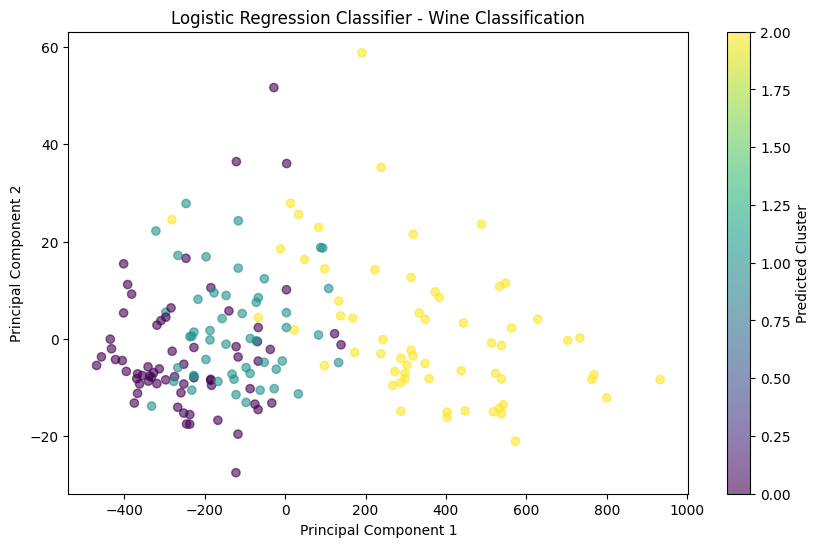

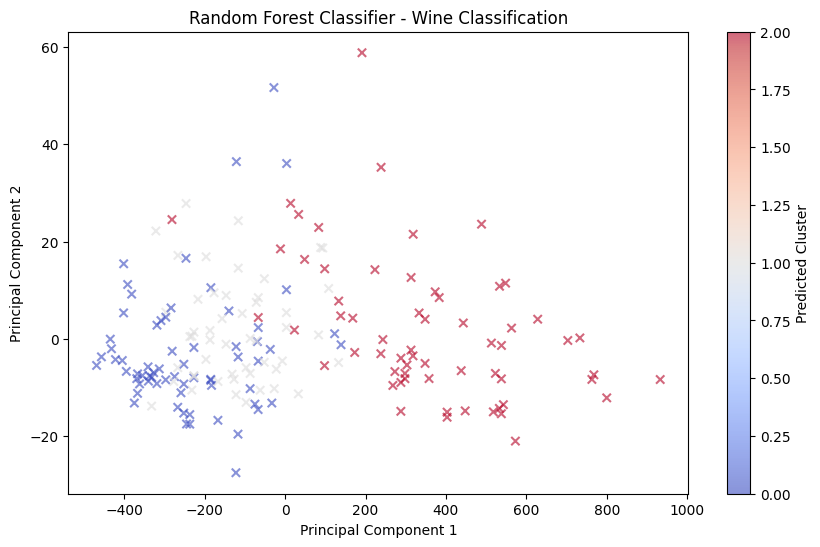

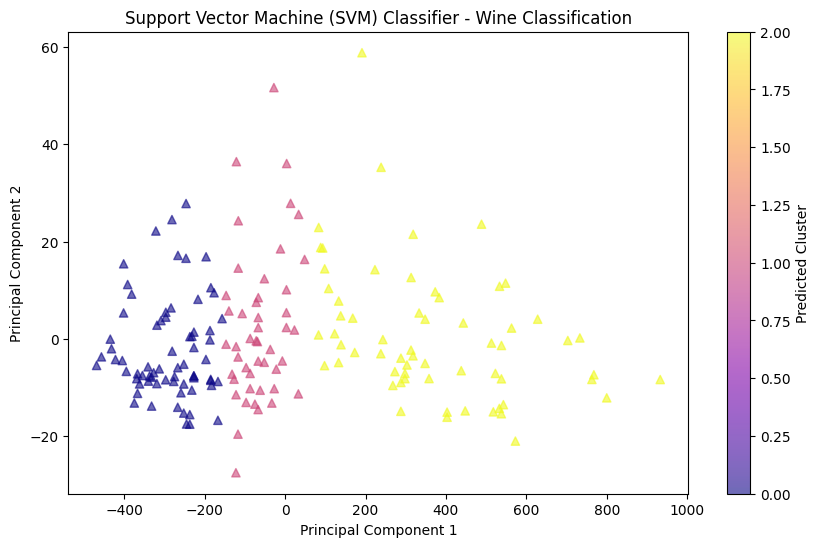

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

# Apply PCA to reduce data to 2 dimensions for visualization
pca = PCA(n_components=2)
wine_data_pca = pca.fit_transform(X)

# Predictions from each model
log_reg_pred = log_reg.predict(X)
rf_clf_pred = rf_clf.predict(X)
svm_clf_pred = svm_clf.predict(X)

# Plotting Logistic Regression Results
plt.figure(figsize=(10, 6))
plt.scatter(wine_data_pca[:, 0], wine_data_pca[:, 1], c=log_reg_pred, cmap='viridis', alpha=0.6)
plt.title('Logistic Regression Classifier - Wine Classification')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Predicted Cluster')
plt.show()

# Plotting Random Forest Results
plt.figure(figsize=(10, 6))
plt.scatter(wine_data_pca[:, 0], wine_data_pca[:, 1], c=rf_clf_pred, cmap='coolwarm', marker='x', alpha=0.6)
plt.title('Random Forest Classifier - Wine Classification')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Predicted Cluster')
plt.show()

# Plotting SVM Results
plt.figure(figsize=(10, 6))
plt.scatter(wine_data_pca[:, 0], wine_data_pca[:, 1], c=svm_clf_pred, cmap='plasma', marker='^', alpha=0.6)
plt.title('Support Vector Machine (SVM) Classifier - Wine Classification')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Predicted Cluster')
plt.show()
